# Importing libraries and data

In [110]:
!pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# --- Python 
from datetime import datetime
import matplotlib.dates as mdates
#-- Import DataSet
# from google.colab import files
# uploaded = files.upload()
# import io
# df = pd.read_csv(io.BytesIO(uploaded['Walmart.csv']))
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv('./data/Wallmart.csv')


# Exploratory Data Analysis (EDA)

In [113]:
list(df.columns)

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [74]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [75]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [76]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11


In [77]:
df['formated_date'] =  df.apply(lambda x: datetime.strptime(x['Date'], '%d-%m-%Y'), axis=1)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,formated_date
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11,2010-02-05
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11,2010-02-12
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11,2010-02-19
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11,2010-02-26
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11,2010-03-05


### What is the average weekly sale price per store?

In [78]:
df_2 = df.groupby(['Store'] , as_index = False).agg({'Weekly_Sales': 'mean' })
df_2.reset_index(drop=True)
df_2.sort_values(by=['Weekly_Sales'], ascending=False).head()

,Store,Weekly_Sales
19,20,"2,107,676.87"
3,4,"2,094,712.96"
13,14,"2,020,978.40"
12,13,"2,003,620.31"
1,2,"1,925,751.34"


### What is the average weekly sales on holidays per store?

In [79]:
df_holidays = df[df['Holiday_Flag'] == 1]
df_holidays = df_holidays.groupby(['Store'] , as_index = False).agg({'Weekly_Sales': 'mean' })
df_holidays.sort_values(by=['Weekly_Sales'], ascending=False).head()
# df_holidays.Holiday_Flag.value_counts(normalize=True)*100

,Store,Weekly_Sales
19,20,"2,249,035.08"
3,4,"2,243,102.62"
13,14,"2,120,583.00"
9,10,"2,113,755.95"
12,13,"2,113,043.81"


### Which attribute has the highest correlation (positive or negative) with the number of sales?

/tmp/ipykernel_1510/884918016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Weekly_Sales'].abs().sort_values(ascending=False)
/tmp/ipykernel_1510/884918016.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm');


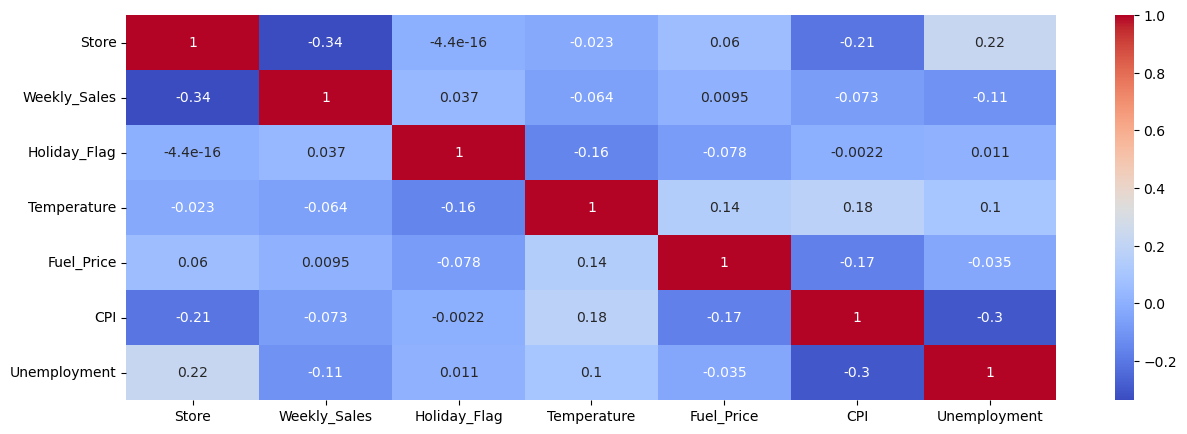

In [80]:
plt.figure(figsize=(15, 5))
df.corr().loc['Weekly_Sales'].abs().sort_values(ascending=False)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');


### From the store with the highest total sales (sum of sales for the entire period), how many weeks of the year did it exceed the average for the period?

In [81]:
df_2 = df.groupby(['Store'] , as_index = False).agg({'Weekly_Sales': 'sum' })
df_2.reset_index(drop=True)
df_2.sort_values(by=['Weekly_Sales'], ascending=False).head()

,Store,Weekly_Sales
19,20,"301,397,792.46"
3,4,"299,543,953.38"
13,14,"288,999,911.34"
12,13,"286,517,703.80"
1,2,"275,382,440.98"


In [82]:
most_selling_store = df.groupby('Store').Weekly_Sales.sum().sort_values(ascending=False).index[0]
print(f"Store: {most_selling_store}")
# df_most_selling_store = df[df['Store'] == 20]
df_most_selling_store = df.query('Store==@most_selling_store')
df_most_selling_store[["formated_date","Weekly_Sales","Store"]].head()

Store: 20


,formated_date,Weekly_Sales,Store
2717,2010-02-05,"2,401,395.47",20
2718,2010-02-12,"2,109,107.90",20
2719,2010-02-19,"2,161,549.76",20
2720,2010-02-26,"1,898,193.95",20
2721,2010-03-05,"2,119,213.72",20


In [83]:
df_weekly_sales_mean = df.groupby(['formated_date'] , as_index = False).agg({'Weekly_Sales': 'mean' })
df_weekly_sales_mean["Store"] = "mean"
# df_weekly_sales_mean.reset_index(drop=True)
df_weekly_sales_mean.sort_values(by=['Weekly_Sales'], ascending=False).head()


,formated_date,Weekly_Sales,Store
46,2010-12-24,"1,798,475.90",mean
98,2011-12-23,"1,711,072.03",mean
94,2011-11-25,"1,479,857.89",mean
42,2010-11-26,"1,462,688.96",mean
45,2010-12-17,"1,373,795.55",mean


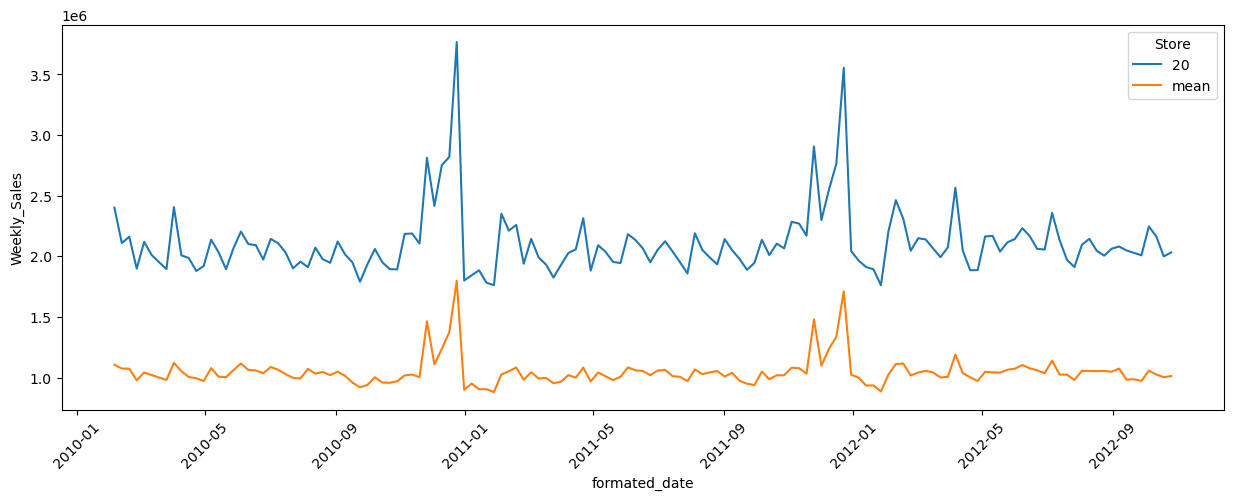

In [84]:
# df_holidays_20 = df[df['Holiday_Flag'] == 1]
# df_holidays_20 = df_holidays_20[df_holidays_20['Store'] == 20]
# union_dfs = pd.concat([df_holidays_20[["formated_date","Weekly_Sales","Store"]], df_weekly_sales_mean])
union_dfs = pd.concat([df_most_selling_store[["formated_date","Weekly_Sales","Store"]], df_weekly_sales_mean])
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.lineplot(data=union_dfs.reset_index(drop=True), x="formated_date", y="Weekly_Sales", hue="Store")
plt.show()

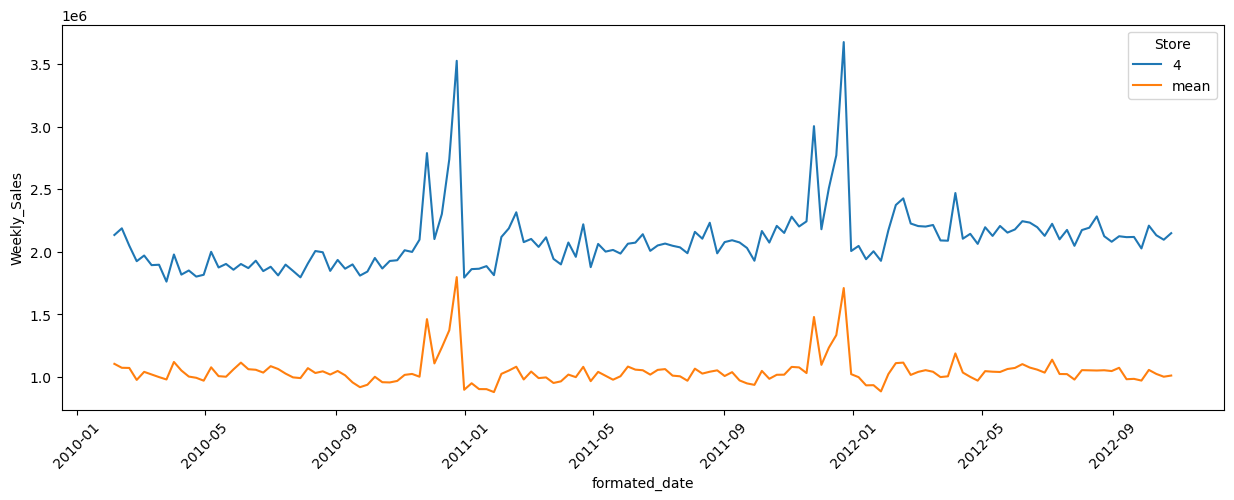

In [85]:
df_store = df[df['Store'] == 4]
df_store[["formated_date","Weekly_Sales","Store"]].head()

union_dfs = pd.concat([df_store[["formated_date","Weekly_Sales","Store"]], df_weekly_sales_mean])
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.lineplot(data=union_dfs.reset_index(drop=True), x="formated_date", y="Weekly_Sales", hue="Store")
plt.show()  #

### Plot the maximum, minimum, and average sales of all stores across the period. Highlight in some way the period of holidays mentioned above.

<AxesSubplot: xlabel='Store', ylabel='Weekly_Sales'>

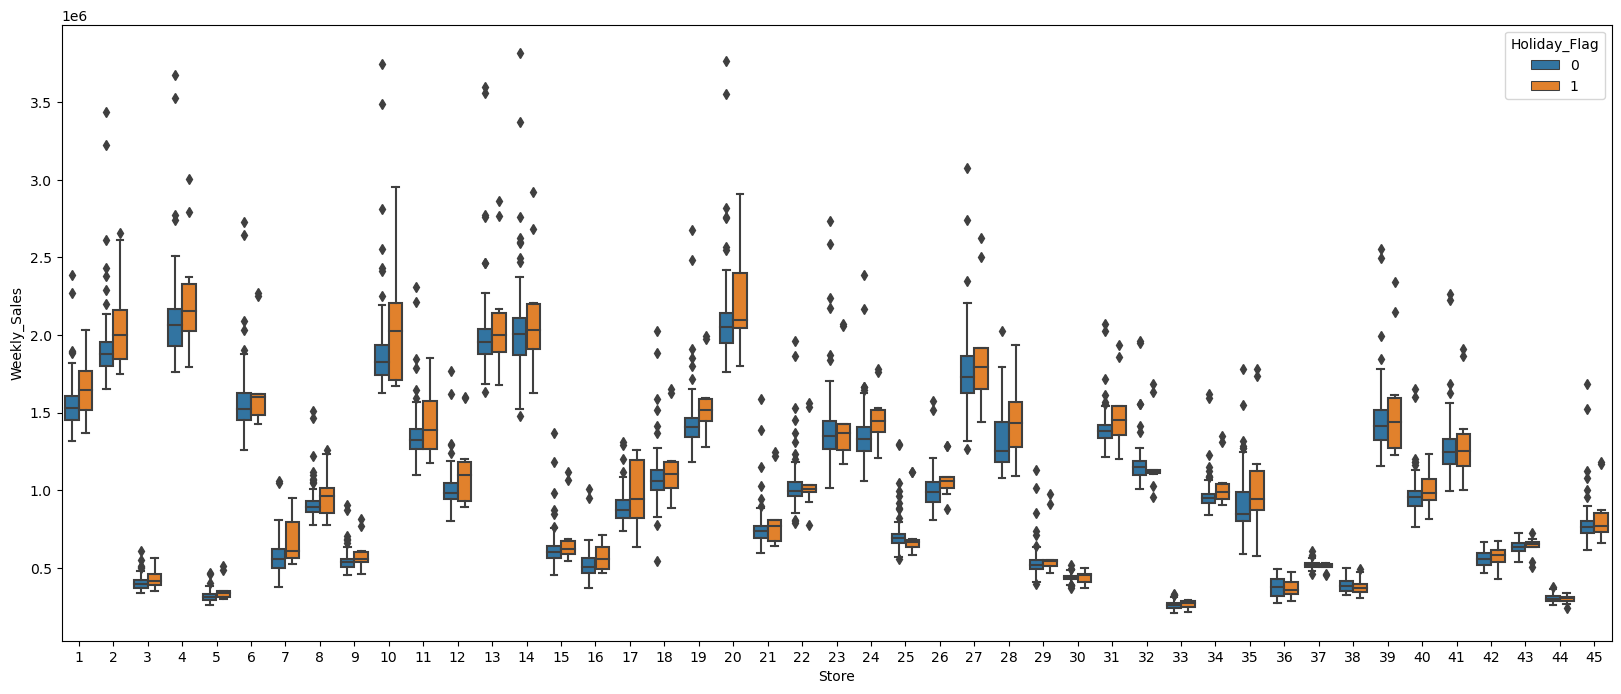

In [86]:
plt.figure(figsize=(20, 8))
# sns.boxplot(data=df, x="Store", y="Weekly_Sales")
sns.boxplot(data=df, x="Store", y="Weekly_Sales",  hue="Holiday_Flag")
# sns.boxplot(data=df, x="Store", y="Weekly_Sales",  hue="Holiday_Flag", dodge=False)


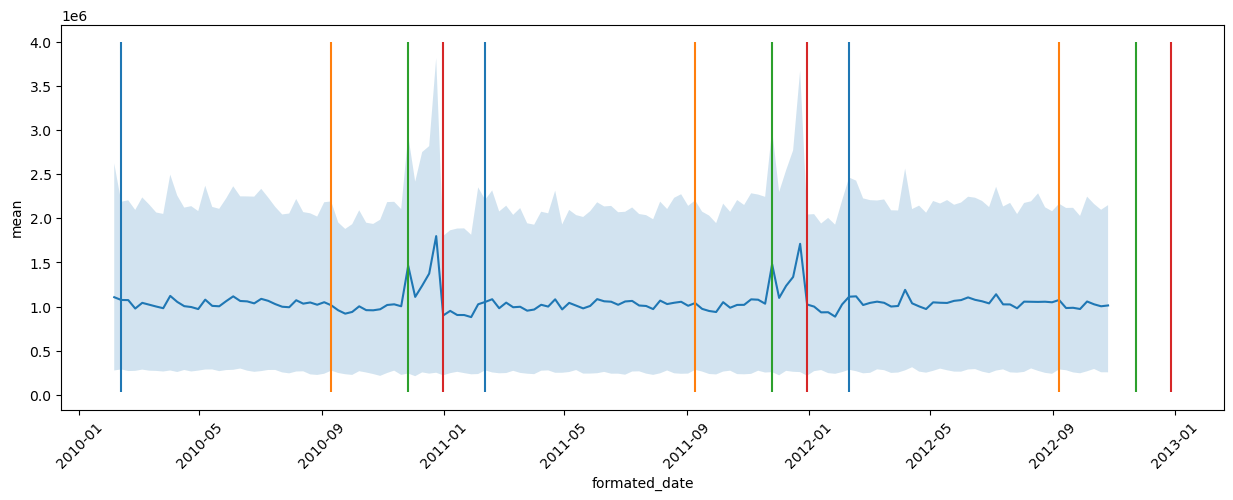

In [87]:
holiday_dict = {
    "Super Bowl": ["12-Feb-10", "11-Feb-11", "10-Feb-12"],
    "Labour Day": ["10-Sep-10", "09-Sep-11", "07-Sep-12"],
    "Thanksgiving": ["26-Nov-10", "25-Nov-11", "23-Nov-12"],
    "Christmas": ["31-Dec-10", "30-Dec-11", "28-Dec-12"],
}

holiday_dict_dt = { k: pd.to_datetime(v,format='%d-%b-%y') for k , v in holiday_dict.items() }

df_holiday = df.groupby('formated_date')['Weekly_Sales'].agg(['min','max','mean']).reset_index()

plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)

multi_plot = sns.lineplot(data=df_holiday, x="formated_date", y="mean")

multi_plot.fill_between(x=df_holiday.formated_date, y1=df_new['min'], y2=df_new['max'], alpha=.2)

ymin,ymax = multi_plot.get_ylim()

for i,(holiday,dates) in enumerate(holiday_dict_dt.items()):
    multi_plot.vlines(x=dates, ymin=ymin, ymax=ymax, label=holiday, color=f'C{i}')

# plt.legend()
plt.show()

# Thinking about invest on one of the stores, which store would you choose and why?

### The recommendation would be to choose the **number 20** store, this has the highest total sales profit, the best average sales in that period and also has the best average sales on holidays, and as we could see there is a positive correlation between sales and holidays, especially the end of year festivities where sales increase significantly for most stores as we can see in the boxplot

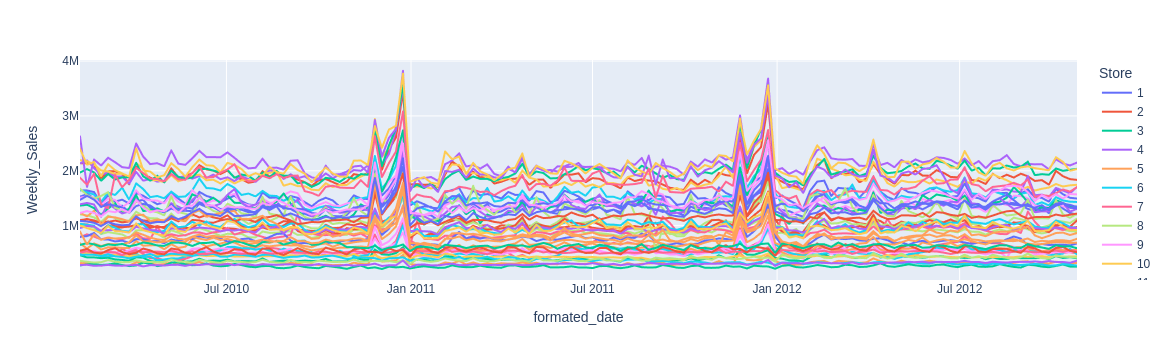

<Figure size 1500x500 with 0 Axes>

In [97]:
df_sorted = df.sort_values(['Store','formated_date'])
groups = df.groupby('Store')['Weekly_Sales']
df_sorted['trend'] = groups.transform(lambda x: x.rolling(4*12, center=True).mean())
df_sorted['id'] = groups.cumcount() + 1

plt.figure(figsize=(15, 5))
# plt.xticks(rotation=45)
px.line(df_sorted, x="formated_date", y="Weekly_Sales", color='Store')

<AxesSubplot: xlabel='id', ylabel='trend'>

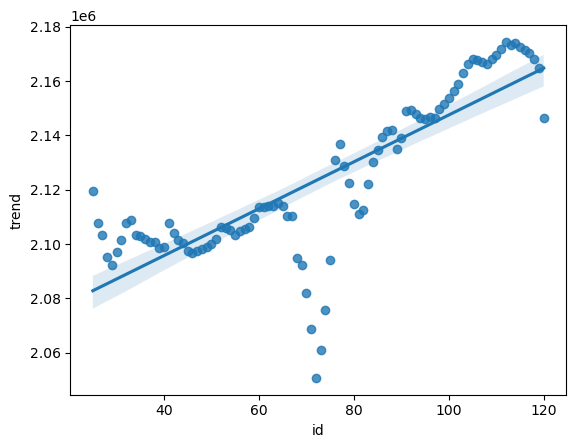

In [99]:
sns.regplot(data=df_sorted.query('Store==20'), x='id', y='trend')